# Импорты

In [2]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from get_dataframes import DataFrames
from sklearn.preprocessing import LabelEncoder

C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import get_dataframes
importlib.reload(get_dataframes)
from get_dataframes import DataFrames

import preprocessing
importlib.reload(preprocessing)
from preprocessing import merge_weather_with_flights

import research
importlib.reload(research)
from research import plot_cancelled_flights, plot_hot_map_with_dep_delay
from research import plot_hot_map_with_dep_delay

# Не импорты

In [4]:
DF = DataFrames()
df_flights = DF.get_df_flights()
df_with_tail_number = DF.get_df_with_tail_number()

In [5]:
jfk_flights_df = df_flights[df_flights['ORIGIN'] == 'JFK']

## Описание датасета

- FL_DATE : object - Дата рейса (yyyy-mm-dd).
- AIRLINE_CODE : object - Уникальный код авиакомпании.
- DOT_CODE : int64 - Идентификационный номер, назначенный US DOT для авиакомпании.
- FL_NUMBER : int64 - Номер рейса.
- ORIGIN : object - Аэропорт отправления.
- ORIGIN_CITY : object - Город отправления.
- DEST : object - Аэропорт прибытия.
- DEST_CITY : object - Город прибытия.
- CRS_DEP_TIME : int64 - Запланированное время отправления (локальное время: hhmm).
- DEP_TIME : float64 - Фактическое время отправления (локальное время: hhmm).
- DEP_DELAY : float64 - Разница между запланированным и фактическим временем отправления (в минутах).
- TAXI_OUT : float64 - Время руления на вылет (в минутах).
- WHEELS_OFF : float64 - Время отрыва от земли (локальное время: hhmm).
- WHEELS_ON : float64 - Время касания земли (локальное время: hhmm).
- TAXI_IN : float64 - Время руления после посадки (в минутах).
- CRS_ARR_TIME : int64 - Запланированное время прибытия (локальное время: hhmm).
- ARR_TIME : float64 - Фактическое время прибытия (локальное время: hhmm).
- ARR_DELAY : float64 - Разница между запланированным и фактическим временем прибытия (в минутах).
- CANCELLED : float64 - Индикация отмены рейса (1 = Да, 0 = Нет).
- CANCELLATION_CODE : object - Причина отмены рейса.
- DIVERTED : float64 - Индикация отклонения рейса (1 = Да, 0 = Нет).
- CRS_ELAPSED_TIME : float64 - Запланированное время полета (в минутах).
- ELAPSED_TIME : float64 - Фактическое время полета (в минутах).
- AIR_TIME : float64 - Время в воздухе (в минутах).
- DISTANCE : float64 - Расстояние между аэропортами (в милях).
- DELAY_DUE_CARRIER : float64 - Задержка по вине авиакомпании (в минутах).
- DELAY_DUE_WEATHER : float64 - Задержка из-за погодных условий (в минутах).
- DELAY_DUE_NAS : float64 - Задержка из-за системы NAS (в минутах).
- DELAY_DUE_SECURITY : float64 - Задержка из-за проблем безопасности (в минутах).
- DELAY_DUE_LATE_AIRCRAFT : float64 - Задержка из-за позднего прибытия самолёта (в минутах).

In [6]:
print('Пропущенных значений в jfk_flights_df:')
for col in jfk_flights_df.columns:
    print(f'{col}: {jfk_flights_df[col].isna().sum()}')

Пропущенных значений в jfk_flights_df:
FL_DATE: 0
AIRLINE: 0
AIRLINE_DOT: 0
AIRLINE_CODE: 0
DOT_CODE: 0
FL_NUMBER: 0
ORIGIN: 0
ORIGIN_CITY: 0
DEST: 0
DEST_CITY: 0
CRS_DEP_TIME: 0
DEP_TIME: 1359
DEP_DELAY: 1359
TAXI_OUT: 1411
WHEELS_OFF: 1411
WHEELS_ON: 1427
TAXI_IN: 1427
CRS_ARR_TIME: 0
ARR_TIME: 1427
ARR_DELAY: 1552
CANCELLED: 0
CANCELLATION_CODE: 49049
DIVERTED: 0
CRS_ELAPSED_TIME: 0
ELAPSED_TIME: 1552
AIR_TIME: 1552
DISTANCE: 0
DELAY_DUE_CARRIER: 40162
DELAY_DUE_WEATHER: 40162
DELAY_DUE_NAS: 40162
DELAY_DUE_SECURITY: 40162
DELAY_DUE_LATE_AIRCRAFT: 40162


In [7]:
print("Данные jfk_flights_df:")
jfk_flights_df

Данные jfk_flights_df:


FL_DATE                AIRLINE                AIRLINE_DOT  \
20       2022-05-05        JetBlue Airways        JetBlue Airways: B6   
136      2021-11-23   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
151      2023-07-02  SkyWest Airlines Inc.  SkyWest Airlines Inc.: OO   
180      2023-03-13        JetBlue Airways        JetBlue Airways: B6   
189      2019-11-26   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
...             ...                    ...                        ...   
2999760  2022-12-13        JetBlue Airways        JetBlue Airways: B6   
2999763  2022-07-02   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999838  2022-11-08   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999884  2019-10-26        JetBlue Airways        JetBlue Airways: B6   
2999893  2021-07-26        JetBlue Airways        JetBlue Airways: B6   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
20                B6     20409       1273    JFK  New York, NY  CHS   
136               DL     19790       1406    JFK  New York, NY  TPA   
151               OO     20304       3950    JFK  New York, NY  IAD   
180               B6     20409       2539    JFK  New York, NY  BQN   
189               DL     19790        347    JFK  New York, NY  DFW   
...              ...       ...        ...    ...           ...  ...   
2999760           B6     20409        403    JFK  New York, NY  SJU   
2999763           DL     19790        863    JFK  New York, NY  ATL   
2999838           DL     19790        639    JFK  New York, NY  SJU   
2999884           B6     20409         65    JFK  New York, NY  ABQ   
2999893           B6     20409        189    JFK  New York, NY  SAN   

                     DEST_CITY  ...  DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME  \
20              Charleston, SC  ...       0.0             129.0         106.0   
136                  Tampa, FL  ...       0.0             166.0         141.0   
151             Washington, DC  ...       0.0              92.0          71.0   
180              Aguadilla, PR  ...       0.0             237.0         229.0   
189      Dallas/Fort Worth, TX  ...       0.0             256.0         270.0   
...                        ...  ...       ...               ...           ...   
2999760           San Juan, PR  ...       0.0             224.0         212.0   
2999763            Atlanta, GA  ...       0.0             152.0         120.0   
2999838           San Juan, PR  ...       0.0             231.0         233.0   
2999884        Albuquerque, NM  ...       0.0             300.0         275.0   
2999893          San Diego, CA  ...       0.0             353.0         325.0   

         AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  \
20           86.0     636.0                NaN                NaN   
136         128.0    1005.0                NaN                NaN   
151          44.0     228.0                NaN                NaN   
180         192.0    1576.0                3.0                0.0   
189         228.0    1391.0                NaN                NaN   
...           ...       ...                ...                ...   
2999760     178.0    1598.0                NaN                NaN   
2999763     101.0     760.0                NaN                NaN   
2999838     196.0    1598.0                NaN                NaN   
2999884     250.0    1826.0                NaN                NaN   
2999893     302.0    2446.0                NaN                NaN   

         DELAY_DUE_NAS  DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
20                 NaN                 NaN                      NaN  
136                NaN                 NaN                      NaN  
151                NaN                 NaN                      NaN  
180                0.0                 0.0                     35.0  
189                NaN                 NaN                      NaN  
...                ...                 ...                  

In [8]:
print("Описательная статистика jfk_flights_df:")
jfk_flights_df.describe()

Описательная статистика jfk_flights_df:


DOT_CODE     FL_NUMBER  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  \
count  50466.000000  50466.000000  50466.000000  49107.000000  49107.000000   
mean   20172.700174   2134.540958   1365.045635   1362.905533     13.315637   
std      291.770413   1867.294068    487.216955    506.586858     52.716449   
min    19690.000000      1.000000    500.000000      1.000000    -62.000000   
25%    19805.000000    523.000000    906.250000    908.000000     -6.000000   
50%    20363.000000   1497.000000   1400.000000   1401.000000     -2.000000   
75%    20409.000000   3579.000000   1800.000000   1810.000000      9.000000   
max    20452.000000   8819.000000   2359.000000   2400.000000   1339.000000   

           TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME  \
count  49055.000000  49055.000000  49039.000000  49039.000000  50466.000000   
mean      24.513036   1394.416838   1481.002345      8.105304   1526.282051   
std       13.320619    515.508834    564.872536      6.589064    548.935817   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       16.000000    928.000000   1052.000000      5.000000   1115.000000   
50%       21.000000   1419.000000   1503.000000      6.000000   1531.000000   
75%       28.000000   1832.000000   1948.000000      9.000000   2010.000000   
max      182.000000   2400.000000   2400.000000    125.000000   2359.000000   

       ...      DIVERTED  CRS_ELAPSED_TIME  ELAPSED_TIME      AIR_TIME  \
count  ...  50466.000000      50466.000000  48914.000000  48914.000000   
mean   ...      0.002675        213.855249    204.694423    172.092612   
std    ...      0.051652        112.705715    112.119703    110.202667   
min    ...      0.000000         54.000000     39.000000     24.000000   
25%    ...      0.000000        120.000000    112.000000     79.000000   
50%    ...      0.000000        184.000000    172.000000    142.000000   
75%    ...      0.000000        334.750000    319.000000    288.000000   
max    ...      1.000000        697.000000    722.000000    689.000000   

           DISTANCE  DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
count  50466.000000       10304.000000       10304.000000   10304.000000   
mean    1211.991717          32.663626           3.084142      18.062209   
std      861.667982          72.335037          27.313740      40.226894   
min       94.000000           0.000000           0.000000       0.000000   
25%      427.000000           0.000000           0.000000       0.000000   
50%     1028.000000          11.000000           0.000000       5.000000   
75%     2153.000000          35.000000           0.000000      23.000000   
max     4983.000000        1334.000000        1101.000000    1003.000000   

       DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
count        10304.000000             10304.000000  
mean             0.112675                19.695070  
std              2.513792                44.668872  
min              0.000000                 0.000000  
25%              0.000000                 0.000000  
50%              0.000000                 0.000000  
75%              0.000000                19.000000  
max            139.000000               697.000000  

[8 rows x 23 columns]


Распределение задержек отправления:


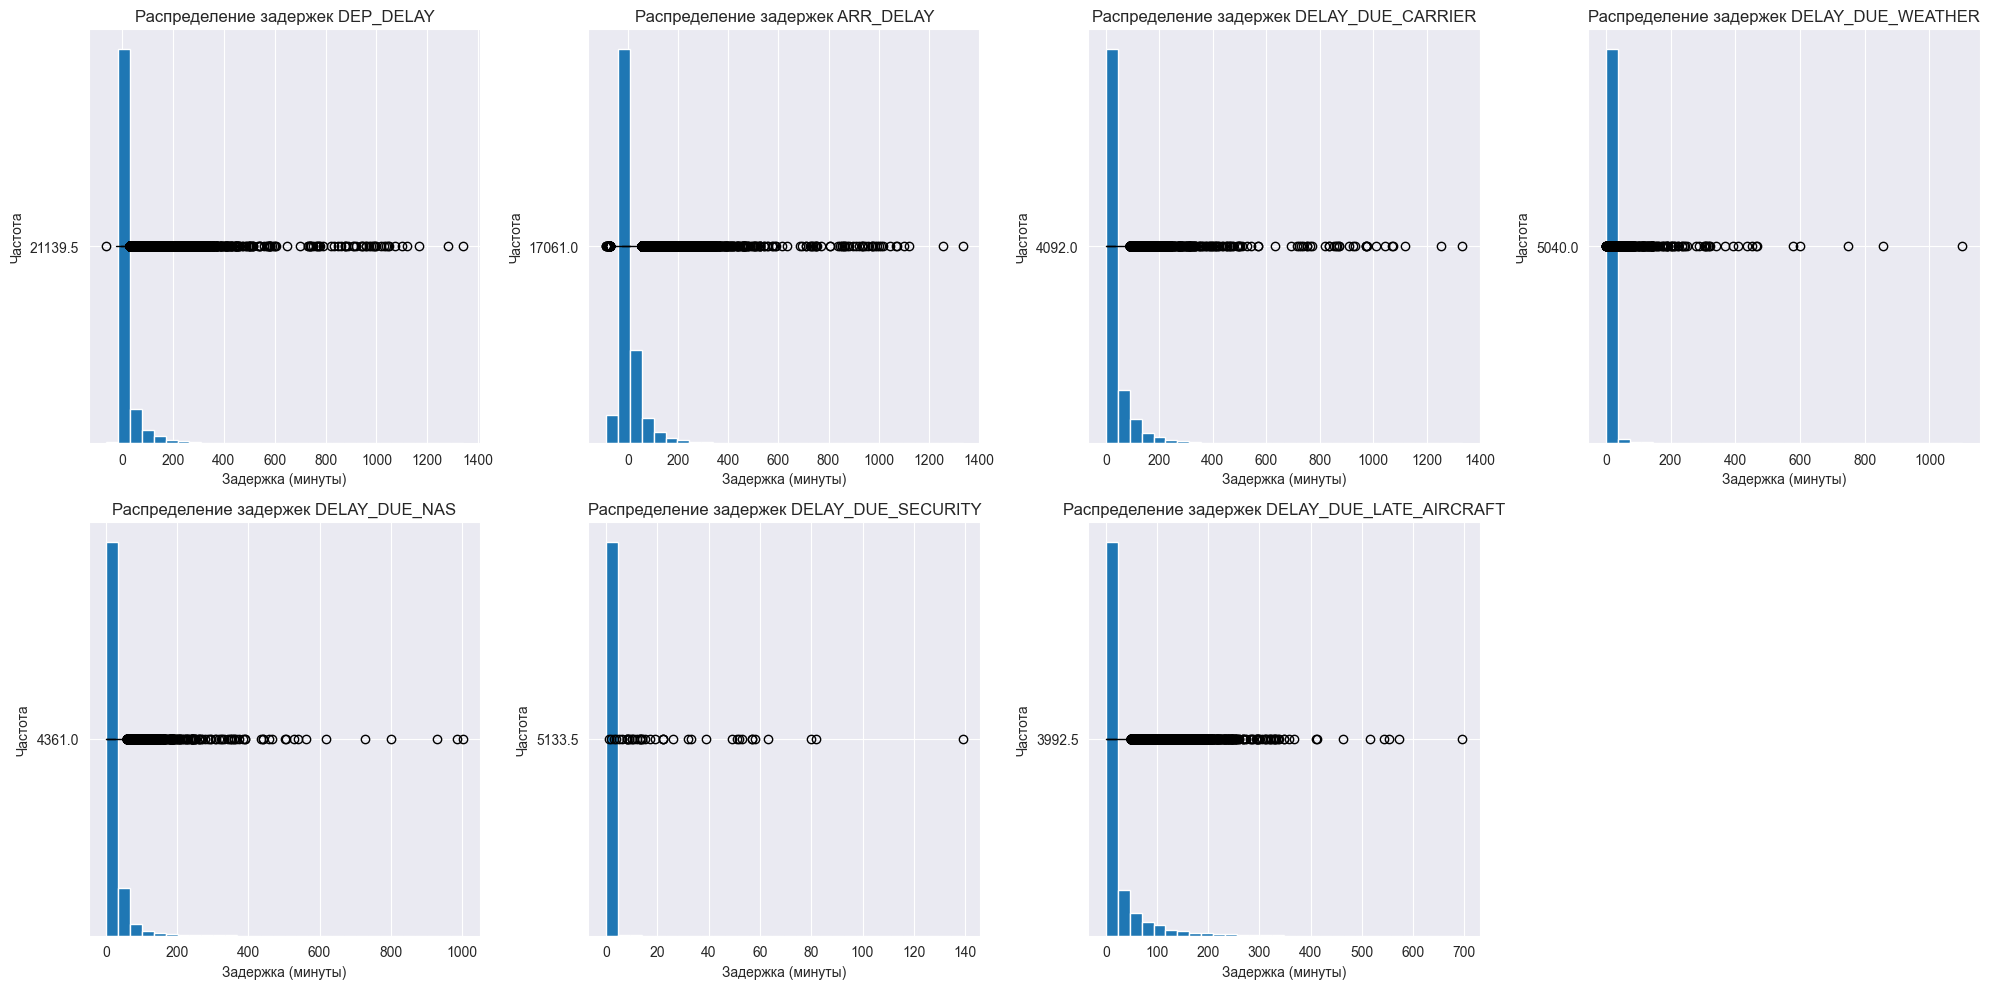

In [9]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in jfk_flights_df.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        count, bins, _ = ax[x, y].hist(jfk_flights_df[col], bins=30)
        pos = max(count) / 2
        ax[x, y].boxplot(jfk_flights_df[col].dropna(), vert=False, positions=[pos])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()


Распределение задержек отправления:


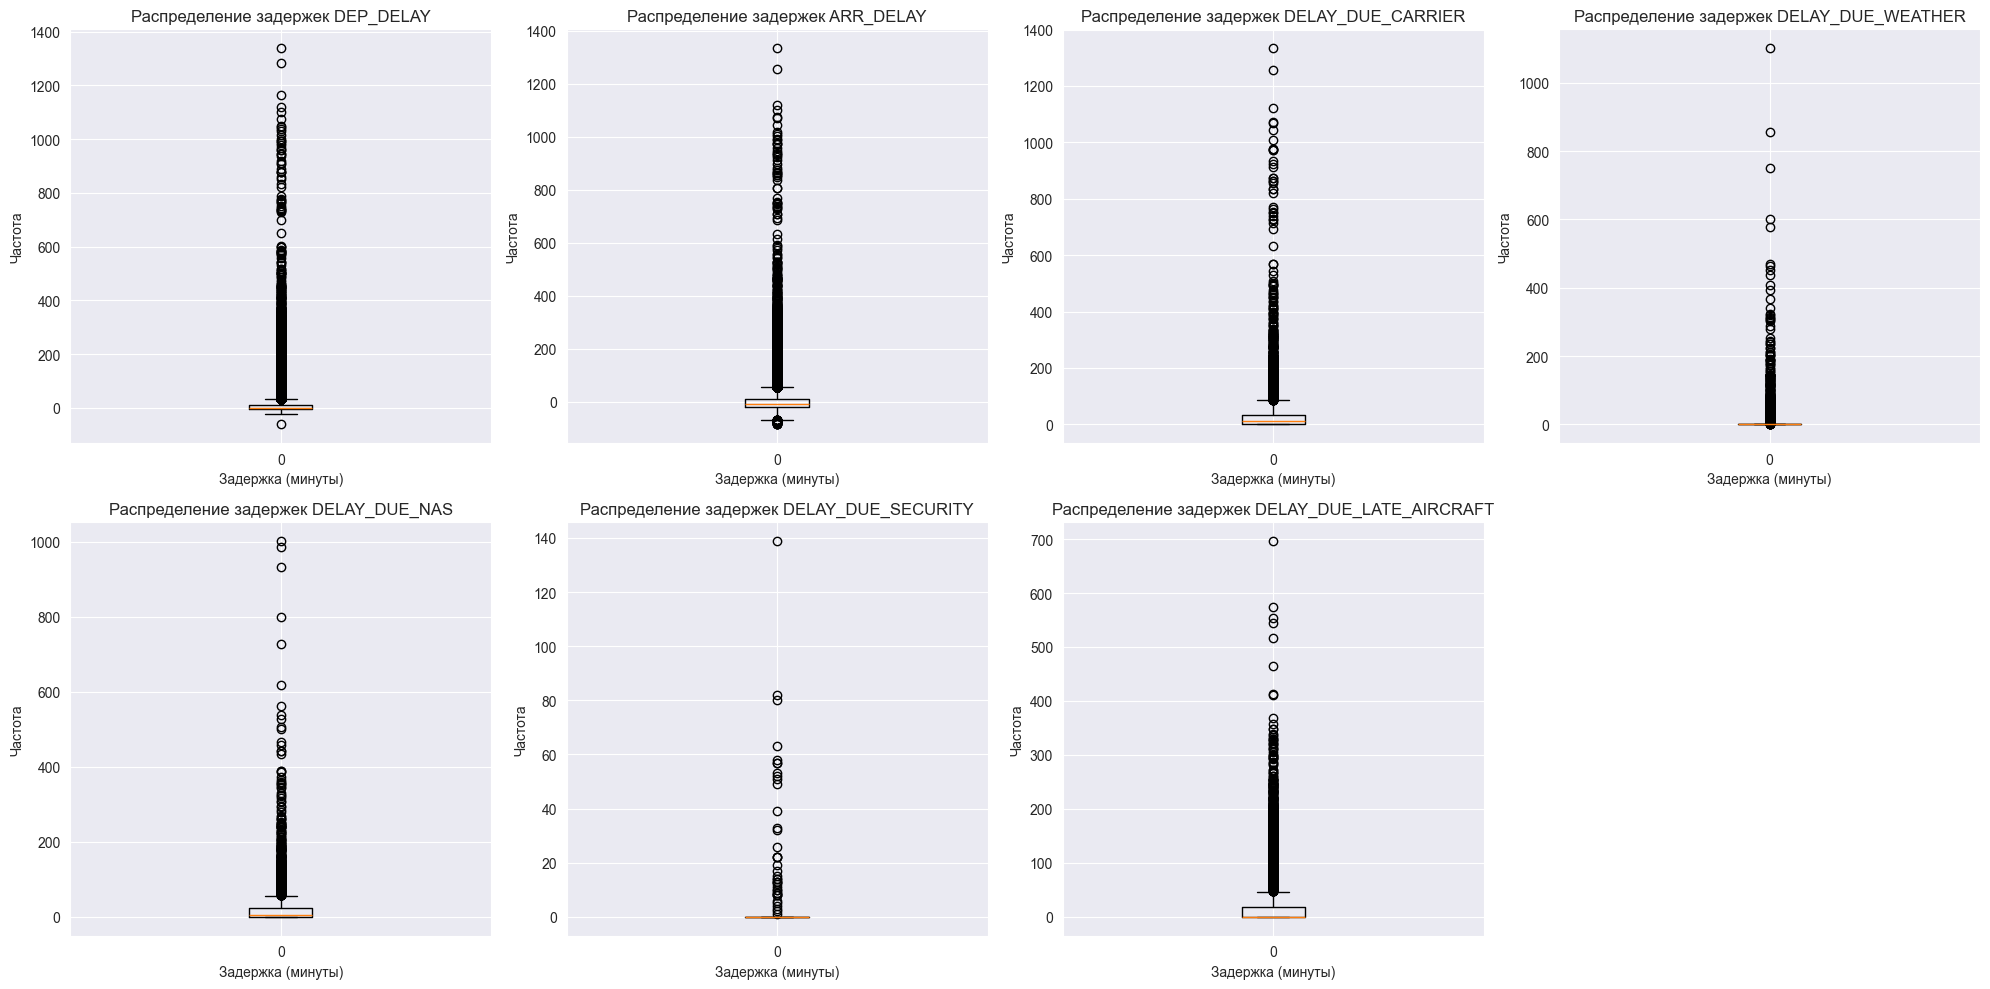

In [10]:
print("\nРаспределение задержек отправления:")
fig, ax = plt.subplots(figsize=(20, 10), ncols=4, nrows=2)
deley_cols = [col for col in jfk_flights_df.columns if 'DELAY' in col]
for i, col in enumerate(deley_cols):
    if 'DELAY' in col:
        x, y =  i // 4, i % 4
        ax[x, y].boxplot(jfk_flights_df[col].dropna(), positions=[0])
        ax[x, y].set_title(f"Распределение задержек {col}")
        ax[x, y].set_xlabel("Задержка (минуты)")
        ax[x, y].set_ylabel("Частота")
fig.delaxes(ax[1, 3])
plt.tight_layout()

In [11]:
jfk_flights_df.isnull()

FL_DATE  AIRLINE  AIRLINE_DOT  AIRLINE_CODE  DOT_CODE  FL_NUMBER  \
20         False    False        False         False     False      False   
136        False    False        False         False     False      False   
151        False    False        False         False     False      False   
180        False    False        False         False     False      False   
189        False    False        False         False     False      False   
...          ...      ...          ...           ...       ...        ...   
2999760    False    False        False         False     False      False   
2999763    False    False        False         False     False      False   
2999838    False    False        False         False     False      False   
2999884    False    False        False         False     False      False   
2999893    False    False        False         False     False      False   

         ORIGIN  ORIGIN_CITY   DEST  DEST_CITY  ...  DIVERTED  \
20        False        False  False      False  ...     False   
136       False        False  False      False  ...     False   
151       False        False  False      False  ...     False   
180       False        False  False      False  ...     False   
189       False        False  False      False  ...     False   
...         ...          ...    ...        ...  ...       ...   
2999760   False        False  False      False  ...     False   
2999763   False        False  False      False  ...     False   
2999838   False        False  False      False  ...     False   
2999884   False        False  False      False  ...     False   
2999893   False        False  False      False  ...     False   

         CRS_ELAPSED_TIME  ELAPSED_TIME  AIR_TIME  DISTANCE  \
20                  False         False     False     False   
136                 False         False     False     False   
151                 False         False     False     False   
180                 False         False     False     False   
189                 False         False     False     False   
...                   ...           ...       ...       ...   
2999760             False         False     False     False   
2999763             False         False     False     False   
2999838             False         False     False     False   
2999884             False         False     False     False   
2999893             False         False     False     False   

         DELAY_DUE_CARRIER  DELAY_DUE_WEATHER  DELAY_DUE_NAS  \
20                    True               True           True   
136                   True               True           True   
151                   True               True           True   
180                  False              False          False   
189                   True               True           True   
...                    ...                ...            ...   
2999760               True               True           True   
2999763               True               True           True   
2999838               True               True           True   
2999884               True               True           True   
2999893               True               True           True   

         DELAY_DUE_SECURITY  DELAY_DUE_LATE_AIRCRAFT  
20                     True                     True  
136                    True                     True  
151                    True                     True  
180                   False                    False  
189                    True                     True  
...                     ...                      ...  
2999760                True                     True  
2999763                True                     True  
2999838                True                     True  
2999884                True                     True  
2999893                True                     True  

[50466 rows x 32 columns]

Text(0.5, 1.0, 'Тепловая карта пропусков в данных')

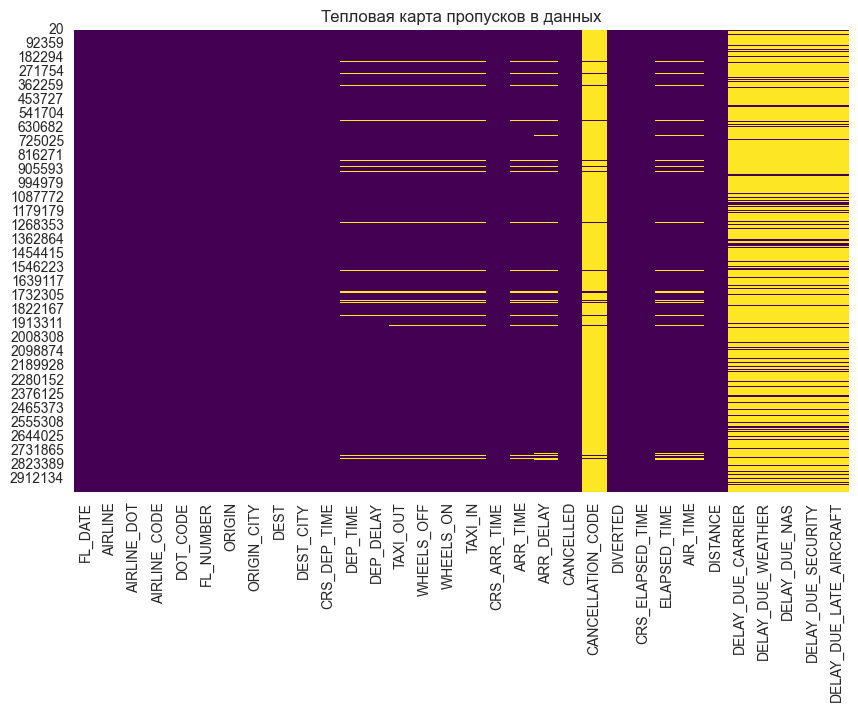

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(jfk_flights_df.isnull(), cbar=False, cmap='viridis')
plt.title("Тепловая карта пропусков в данных")

C:\Users\Mi\AppData\Local\Temp\ipykernel_50016\850118664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['FL_DATE'] = pd.to_datetime(jfk_flights_df['FL_DATE']).copy()
C:\Users\Mi\AppData\Local\Temp\ipykernel_50016\850118664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['Month'] = jfk_flights_df['FL_DATE'].dt.month.copy()
C:\Users\Mi\AppData\Local\Temp\ipykernel_50016\850118664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

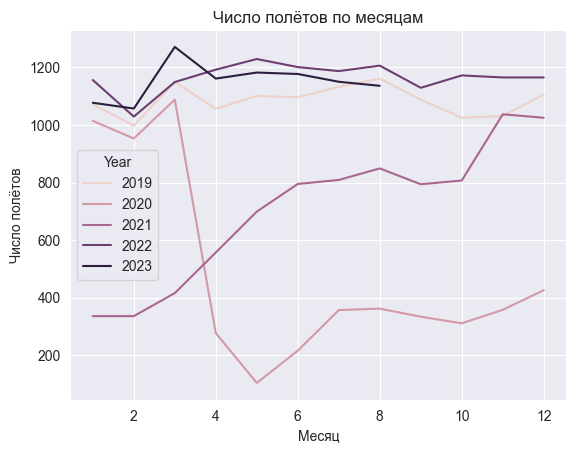

In [12]:
if 'FL_DATE' in jfk_flights_df.columns:
    jfk_flights_df['FL_DATE'] = pd.to_datetime(jfk_flights_df['FL_DATE']).copy()
    jfk_flights_df['Month'] = jfk_flights_df['FL_DATE'].dt.month.copy()
    jfk_flights_df['Year'] = jfk_flights_df['FL_DATE'].dt.year.copy()

    monthly_flights = jfk_flights_df.groupby(['Year', 'Month']).size().reset_index(name='Flights')
    sns.lineplot(data=monthly_flights, x='Month', y='Flights', hue='Year')
    plt.title("Число полётов по месяцам")
    plt.xlabel("Месяц")
    plt.ylabel("Число полётов")
    plt.show()

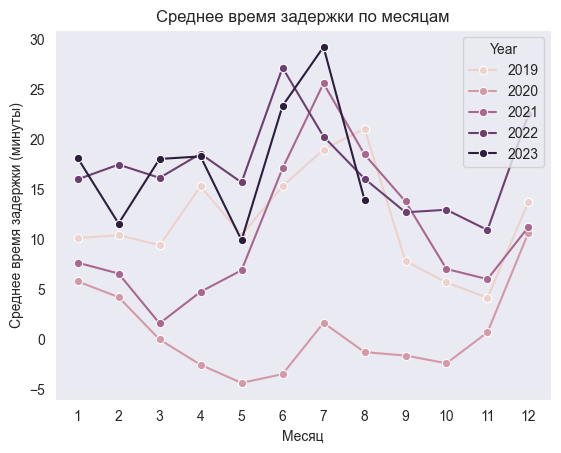

In [13]:
if 'FL_DATE' in df_flights.columns and 'DEP_DELAY' in jfk_flights_df.columns:
    monthly_delays = jfk_flights_df.groupby(['Year', 'Month'])['DEP_DELAY'].mean().reset_index()

    sns.lineplot(data=monthly_delays, x='Month', y='DEP_DELAY', hue='Year', marker='o')
    plt.title("Среднее время задержки по месяцам")
    plt.xlabel("Месяц")
    plt.ylabel("Среднее время задержки (минуты)")
    plt.xticks(range(1, 13))  # Для отображения месяцев 1-12
    plt.grid()

C:\Users\Mi\AppData\Local\Temp\ipykernel_50016\1714454432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_flights_df['Cancelled'] = jfk_flights_df['CANCELLATION_CODE'].notnull()


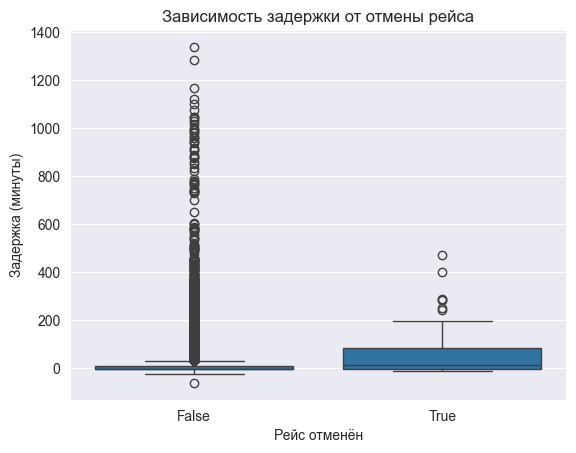

In [14]:
if 'DEP_DELAY' in jfk_flights_df.columns and 'CANCELLATION_CODE' in jfk_flights_df.columns:
    jfk_flights_df['Cancelled'] = jfk_flights_df['CANCELLATION_CODE'].notnull()
    sns.boxplot(data=jfk_flights_df, x='Cancelled', y='DEP_DELAY')
    plt.title("Зависимость задержки от отмены рейса")
    plt.xlabel("Рейс отменён")
    plt.ylabel("Задержка (минуты)")
    plt.show()

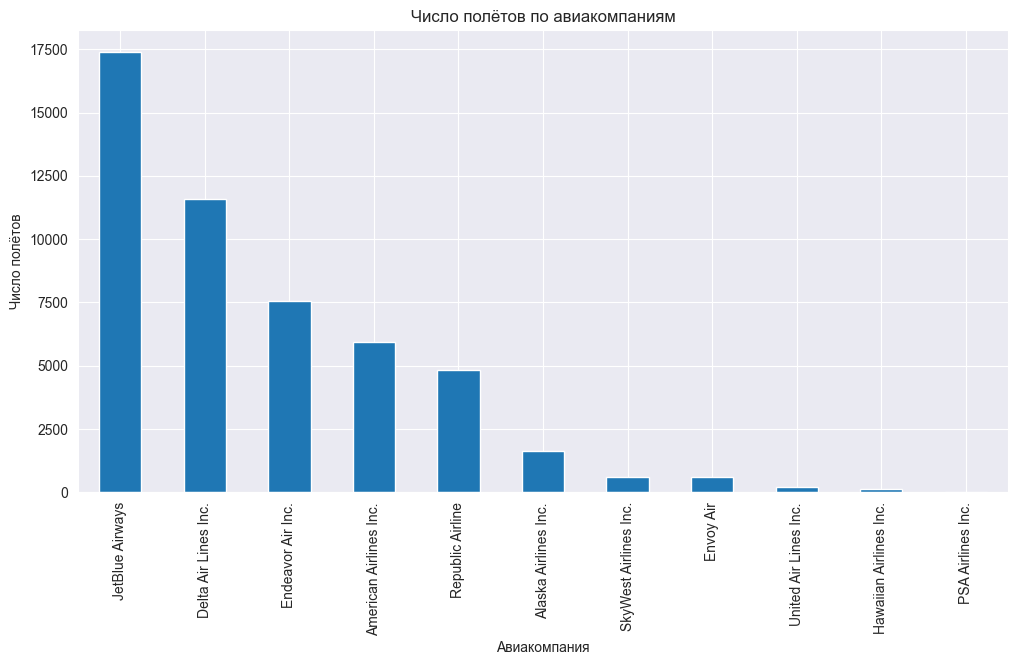

In [15]:
if 'AIRLINE' in jfk_flights_df.columns:
    airline_counts = jfk_flights_df['AIRLINE'].value_counts()
    airline_counts.plot(kind='bar', figsize=(12, 6))
    plt.title("Число полётов по авиакомпаниям")
    plt.xlabel("Авиакомпания")
    plt.ylabel("Число полётов")
    plt.show()

# Сохранение результата в файл (если потребуется)
# summary_path = "flights_data_summary.csv"
# flights_data.describe().to_csv(summary_path)
# print(f"Описательная статистика сохранена в {summary_path}")

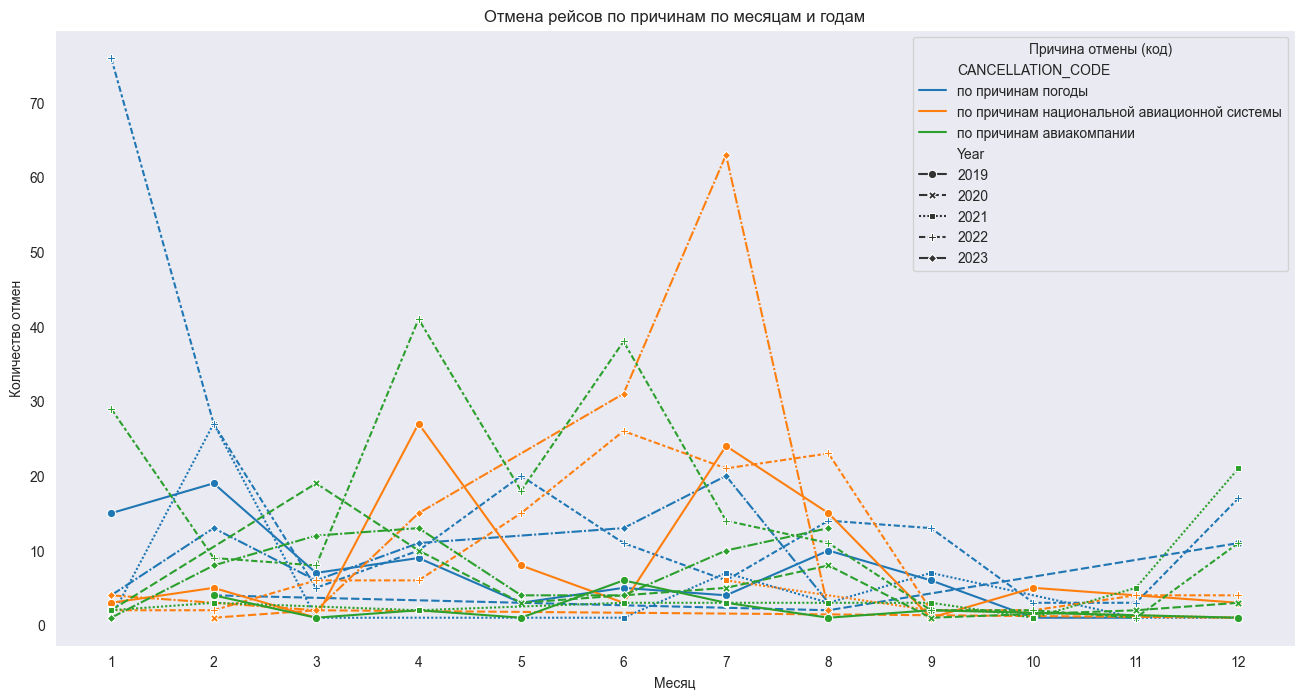

In [16]:
plot_cancelled_flights(jfk_flights_df, cols_type=1)

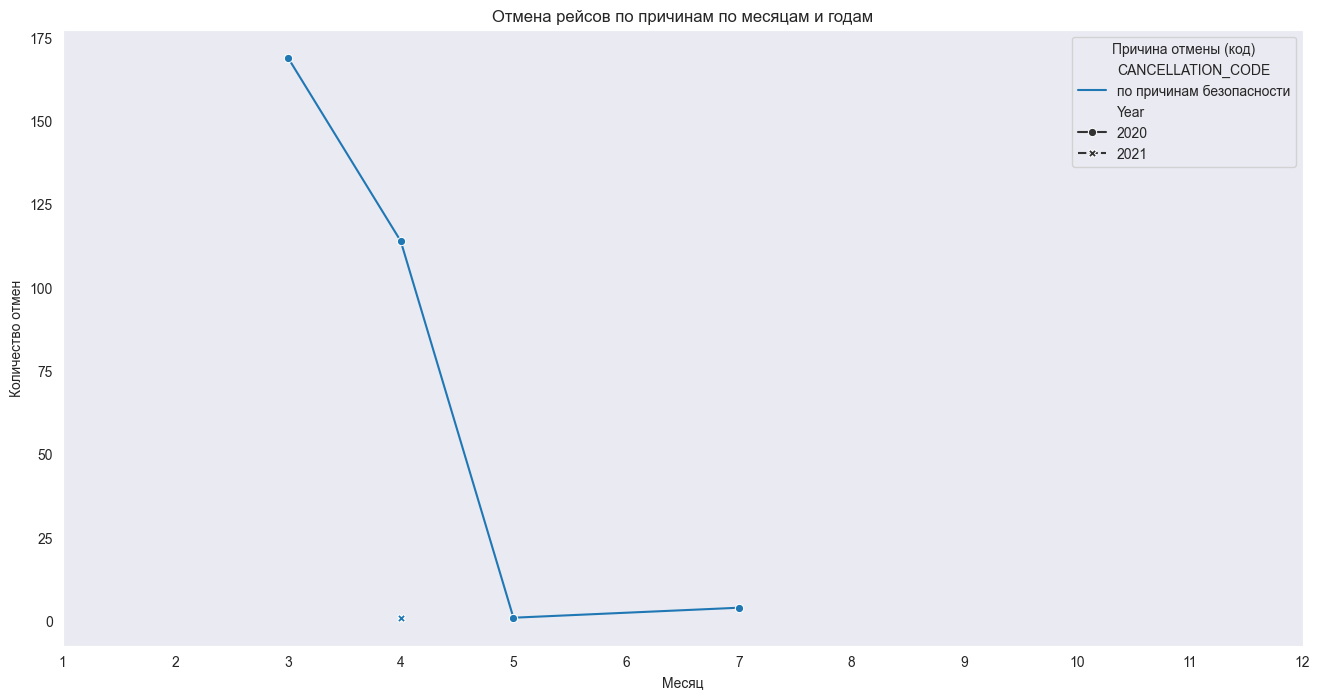

In [17]:
plot_cancelled_flights(jfk_flights_df, cols_type=0)

In [18]:
jfk_flights_df

FL_DATE                AIRLINE                AIRLINE_DOT  \
20      2022-05-05        JetBlue Airways        JetBlue Airways: B6   
136     2021-11-23   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
151     2023-07-02  SkyWest Airlines Inc.  SkyWest Airlines Inc.: OO   
180     2023-03-13        JetBlue Airways        JetBlue Airways: B6   
189     2019-11-26   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
...            ...                    ...                        ...   
2999760 2022-12-13        JetBlue Airways        JetBlue Airways: B6   
2999763 2022-07-02   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999838 2022-11-08   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999884 2019-10-26        JetBlue Airways        JetBlue Airways: B6   
2999893 2021-07-26        JetBlue Airways        JetBlue Airways: B6   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
20                B6     20409       1273    JFK  New York, NY  CHS   
136               DL     19790       1406    JFK  New York, NY  TPA   
151               OO     20304       3950    JFK  New York, NY  IAD   
180               B6     20409       2539    JFK  New York, NY  BQN   
189               DL     19790        347    JFK  New York, NY  DFW   
...              ...       ...        ...    ...           ...  ...   
2999760           B6     20409        403    JFK  New York, NY  SJU   
2999763           DL     19790        863    JFK  New York, NY  ATL   
2999838           DL     19790        639    JFK  New York, NY  SJU   
2999884           B6     20409         65    JFK  New York, NY  ABQ   
2999893           B6     20409        189    JFK  New York, NY  SAN   

                     DEST_CITY  ...  AIR_TIME  DISTANCE  DELAY_DUE_CARRIER  \
20              Charleston, SC  ...      86.0     636.0                NaN   
136                  Tampa, FL  ...     128.0    1005.0                NaN   
151             Washington, DC  ...      44.0     228.0                NaN   
180              Aguadilla, PR  ...     192.0    1576.0                3.0   
189      Dallas/Fort Worth, TX  ...     228.0    1391.0                NaN   
...                        ...  ...       ...       ...                ...   
2999760           San Juan, PR  ...     178.0    1598.0                NaN   
2999763            Atlanta, GA  ...     101.0     760.0                NaN   
2999838           San Juan, PR  ...     196.0    1598.0                NaN   
2999884        Albuquerque, NM  ...     250.0    1826.0                NaN   
2999893          San Diego, CA  ...     302.0    2446.0                NaN   

         DELAY_DUE_WEATHER  DELAY_DUE_NAS  DELAY_DUE_SECURITY  \
20                     NaN            NaN                 NaN   
136                    NaN            NaN                 NaN   
151                    NaN            NaN                 NaN   
180                    0.0            0.0                 0.0   
189                    NaN            NaN                 NaN   
...                    ...            ...                 ...   
2999760                NaN            NaN                 NaN   
2999763                NaN            NaN                 NaN   
2999838                NaN            NaN                 NaN   
2999884                NaN            NaN                 NaN   
2999893                NaN            NaN                 NaN   

         DELAY_DUE_LATE_AIRCRAFT  Month  Year  Cancelled  
20                           NaN      5  2022      False  
136                          NaN     11  2021      False  
151                          NaN      7  2023      False  
180                         35.0      3  2023      False  
189                          NaN     11  2019      False  
...                          ...    ...   ...        ...  
2999760                      NaN     12  2022      False  
2999763                      NaN      7  2022      False  
2999838                      NaN     11  202

In [19]:
# type(jfk_flights_df.info())
jfk_flights_df.select_dtypes(include=['number']).columns

Index(['DOT_CODE', 'FL_NUMBER', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year'],
      dtype='object')

In [20]:
numeric_feathures = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
                    'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
                     'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
                     'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
                     'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                     'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year']

Text(0.5, 1.0, 'Матрица корреляции')

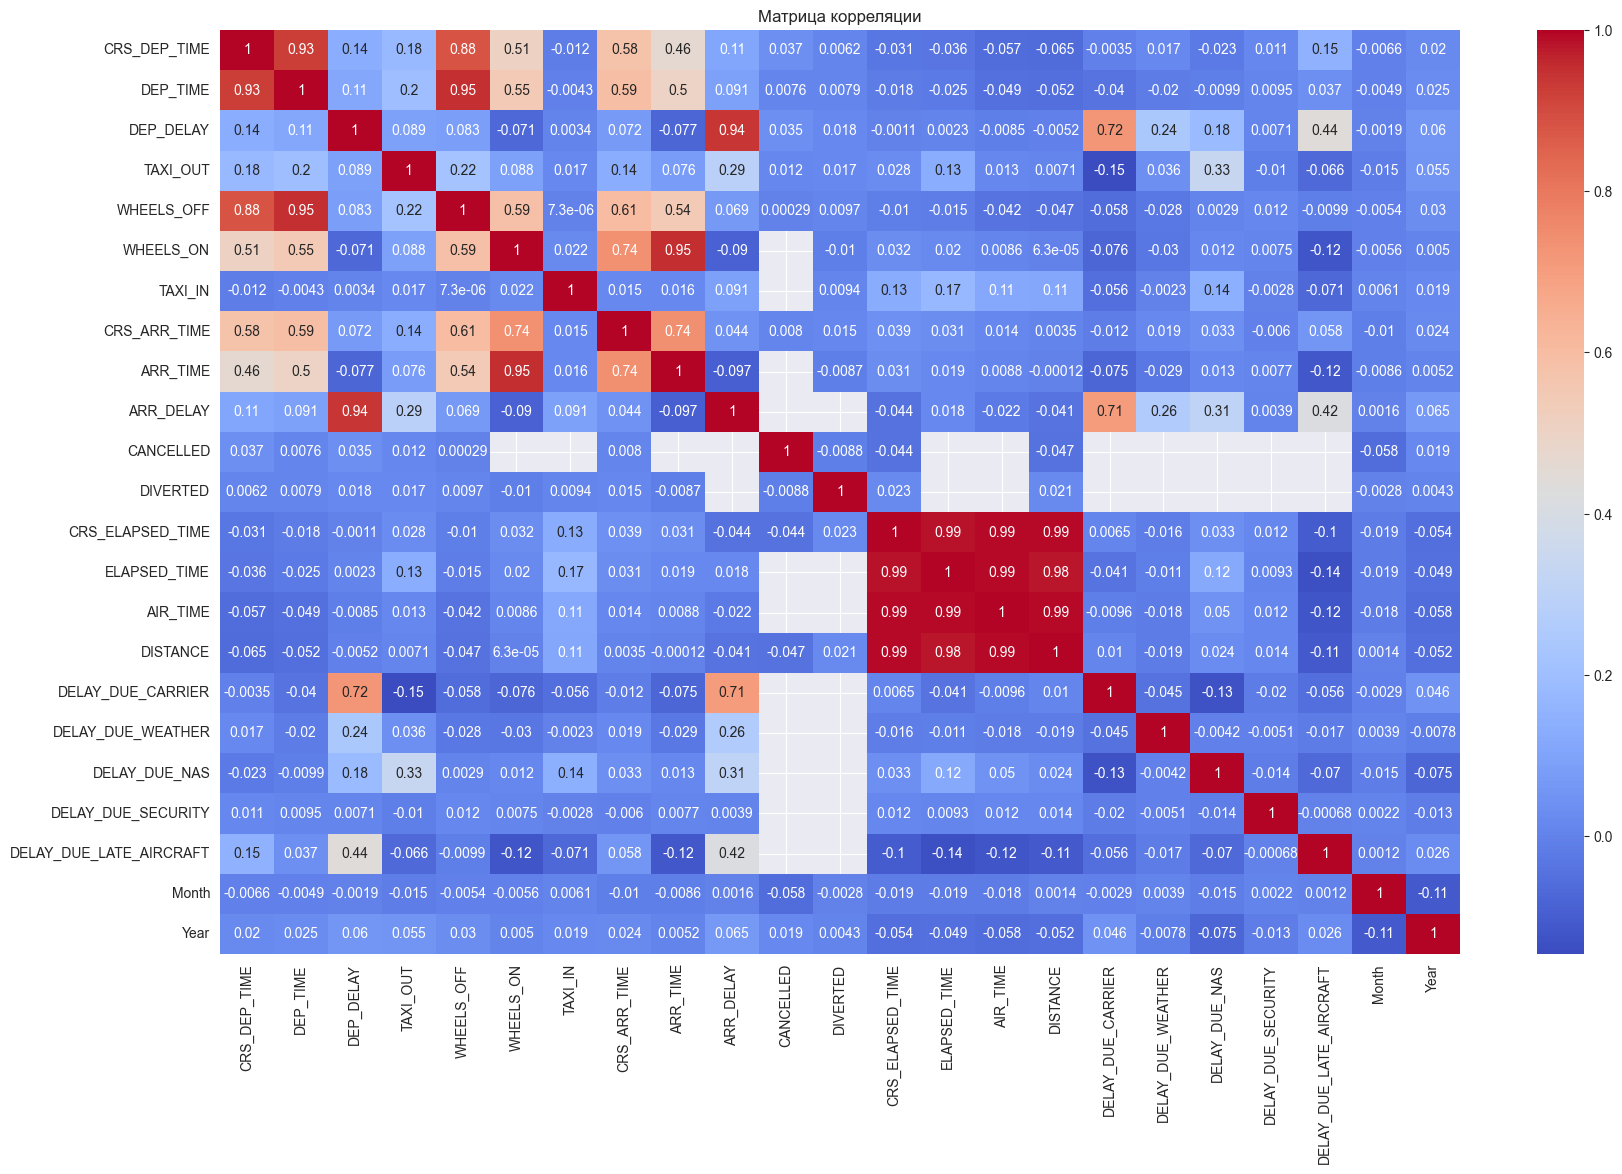

In [21]:
jfk_flights_df_numeric = jfk_flights_df[numeric_feathures].copy()
corr_df = jfk_flights_df_numeric.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")

In [22]:
weather_data = pd.read_csv('data_enhanced_jfk_weather.csv')

In [23]:
weather_data

station                valid   tmpf   dwpf    relh    drct   sknt  p01i  \
0         JFK  2019-11-01 00:24:00  66.00  66.00  100.00  180.00  26.00  0.00   
1         JFK  2019-11-01 00:51:00  67.00  67.00  100.00  180.00  22.00  0.00   
2         JFK  2019-11-01 01:51:00  67.00  67.00  100.00  180.00  28.00  0.00   
3         JFK  2019-11-01 02:51:00  67.00  67.00  100.00  180.00  31.00  0.00   
4         JFK  2019-11-01 03:51:00  67.00  67.00  100.00  180.00  32.00  0.00   
...       ...                  ...    ...    ...     ...     ...    ...   ...   
11275     JFK  2020-12-30 19:51:00  40.00  24.10   52.88  200.00  11.00  0.00   
11276     JFK  2020-12-30 20:51:00  40.00  26.10   57.47  200.00  10.00  0.00   
11277     JFK  2020-12-30 21:51:00  39.00  25.00   56.86  200.00  13.00  0.00   
11278     JFK  2020-12-30 22:51:00  40.00  28.00   62.15  200.00  14.00  0.00   
11279     JFK  2020-12-30 23:51:00  41.00  27.00   57.15  210.00  15.00  0.00   

        alti     mslp  ...    peak_wind_time   feel  \
0      29.68        M  ...  2019-11-01 00:10  66.00   
1      29.66  1004.30  ...  2019-11-01 00:46  66.90   
2      29.64  1003.50  ...  2019-11-01 01:35  66.90   
3      29.60  1002.30  ...  2019-11-01 02:47  66.90   
4      29.55  1000.50  ...  2019-11-01 03:04  66.90   
...      ...      ...  ...               ...    ...   
11275  30.30  1026.10  ...                 M  32.45   
11276  30.27  1025.10  ...                 M  32.87   
11277  30.25  1024.30  ...                 M  30.54   
11278  30.22  1023.40  ...                 M  31.35   
11279  30.20  1022.60  ...                 M  32.45   

                                                   metar snowdepth  \
0      KJFK 010024Z 18026G31KT 6SM BR OVC005 19/19 A2...         M   
1      KJFK 010051Z 18022G34KT 8SM OVC005 19/19 A2966...         M   
2      KJFK 010151Z 18028G37KT 8SM OVC006 19/19 A2964...         M   
3      KJFK 010251Z 18031G39KT 7SM OVC007 19/19 A2960...         M   
4      KJFK 010351Z 18032G39KT 8SM OVC008 19/19 A2955...         M   
...                                                  ...       ...   
11275  KJFK 301951Z 20011KT 10SM FEW045 FEW140 BKN250...         M   
11276  KJFK 302051Z 20010KT 10SM FEW045 BKN250 04/M03...         M   
11277  KJFK 302151Z 20013KT 10SM FEW045 BKN230 04/M04...         M   
11278  KJFK 302251Z 20014KT 10SM BKN250 04/M02 A3022 ...         M   
11279  KJFK 302351Z 21015KT 10SM BKN250 05/M03 A3020 ...         M   

      inx_danjerous_1 inx_danjerous_2 inx_danjerous_3 inx_danjerous_4  \
0            8.000000        0.000000            0.00             0.0   
1            8.000000        0.000000            0.00             0.0   
2            6.666667        0.000000            0.00             0.0   
3            5.714286        0.000000            0.00             0.0   
4            5.000000        0.000000            0.00             0.0   
...               ...             ...             ...             ...   
11275        0.222222        0.071429            0.12             0.0   
11276        0.222222        0.120000            0.00             0.0   
11277        0.222222        0.130435            0.00             0.0   
11278        0.120000        0.000000            0.00             0.0   
11279        0.120000        0.000000            0.00             0.0   

         DATE_JFK  TIME_JFK  
0      2019-10-31  20:24:00  
1      2019-10-31  20:51:00  
2      2019-10-31  21:51:00  
3      2019-10-31  22:51:00  
4      2019-10-31  23:51:00  
...           ...       ...  
11275  2020-12-30  14:51:00  
11276  2020-12-30  15:51:00  
11277  2020-12-30  16:51:00  
11278  2020-12-30  17:51:00  
11279  2020-12-30  18:51:00  

[11280 rows x 36 columns]

In [24]:
numeric_weather_data_columns = weather_data.select_dtypes(include='number').columns
numeric_jfk_flights_df_columns = jfk_flights_df.select_dtypes(include='number').columns

In [25]:
numeric_jfk_flights_df_columns

Index(['DOT_CODE', 'FL_NUMBER', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year'],
      dtype='object')

In [26]:
[]

[]

In [27]:
# выполняется 36 секунд!
jfk_flights_weather_df = merge_weather_with_flights(jfk_flights_df, weather_data)
jfk_flights_weather_df

C:\Users\Mi\Desktop\Университет\Методы и технологии машинного обучения\Проект\forecasting_aircraft_delays\preprocessing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'])
C:\Users\Mi\Desktop\Университет\Методы и технологии машинного обучения\Проект\forecasting_aircraft_delays\preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].apply(convert_crs_dep_time)
C:\Users\Mi\Desktop\

FL_DATE                AIRLINE                AIRLINE_DOT  \
20      2022-05-05        JetBlue Airways        JetBlue Airways: B6   
136     2021-11-23   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
151     2023-07-02  SkyWest Airlines Inc.  SkyWest Airlines Inc.: OO   
180     2023-03-13        JetBlue Airways        JetBlue Airways: B6   
189     2019-11-26   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
...            ...                    ...                        ...   
2999760 2022-12-13        JetBlue Airways        JetBlue Airways: B6   
2999763 2022-07-02   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999838 2022-11-08   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999884 2019-10-26        JetBlue Airways        JetBlue Airways: B6   
2999893 2021-07-26        JetBlue Airways        JetBlue Airways: B6   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
20                B6     20409       1273    JFK  New York, NY  CHS   
136               DL     19790       1406    JFK  New York, NY  TPA   
151               OO     20304       3950    JFK  New York, NY  IAD   
180               B6     20409       2539    JFK  New York, NY  BQN   
189               DL     19790        347    JFK  New York, NY  DFW   
...              ...       ...        ...    ...           ...  ...   
2999760           B6     20409        403    JFK  New York, NY  SJU   
2999763           DL     19790        863    JFK  New York, NY  ATL   
2999838           DL     19790        639    JFK  New York, NY  SJU   
2999884           B6     20409         65    JFK  New York, NY  ABQ   
2999893           B6     20409        189    JFK  New York, NY  SAN   

                     DEST_CITY  ...     skyl1  skyl2  skyl3  skyl4  snowdepth  \
20              Charleston, SC  ...      None   None   None   None       None   
136                  Tampa, FL  ...      None   None   None   None       None   
151             Washington, DC  ...      None   None   None   None       None   
180              Aguadilla, PR  ...      None   None   None   None       None   
189      Dallas/Fort Worth, TX  ...  25000.00      M      M      M          M   
...                        ...  ...       ...    ...    ...    ...        ...   
2999760           San Juan, PR  ...      None   None   None   None       None   
2999763            Atlanta, GA  ...      None   None   None   None       None   
2999838           San Juan, PR  ...      None   None   None   None       None   
2999884        Albuquerque, NM  ...      None   None   None   None       None   
2999893          San Diego, CA  ...      None   None   None   None       None   

         station   tmpf                valid   vsby  wxcodes  
20          None   None                 None   None     None  
136         None   None                 None   None     None  
151         None   None                 None   None     None  
180         None   None                 None   None     None  
189          JFK  49.00  2019-11-26 22:51:00  10.00        M  
...          ...    ...                  ...    ...      ...  
2999760     None   None                 None   None     None  
2999763     None   None                 None   None     None  
2999838     None   None                 None   None     None  
2999884     None   None                 None   None     None  
2999893     None   None                 None   None     None  

[50466 rows x 69 columns]

In [28]:
jfk_df_columns = jfk_flights_weather_df.columns
for col in numeric_weather_data_columns:
    if col in jfk_df_columns and col != 'CRS_DEP_TIME':
        jfk_flights_weather_df[col] = jfk_flights_weather_df[col].astype(float)
for col in numeric_jfk_flights_df_columns:
    if col in jfk_df_columns and col != 'CRS_DEP_TIME':
        jfk_flights_weather_df[col] = jfk_flights_weather_df[col].astype(float)

In [29]:
jfk_flights_weather_df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Month', 'Year', 'Cancelled', 'alti', 'drct',
       'dwpf', 'feel', 'gust', 'ice_accretion_1hr', 'ice_accretion_3hr',
       'ice_accretion_6hr', 'inx_danjerous_1', 'inx_danjerous_2',
       'inx_danjerous_3', 'inx_danjerous_4', 'metar', 'mslp', 'p01i',
       'peak_wind_drct', 'peak_wind_gust', 'peak_wind_time', 'relh', 'sknt',
       'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'snowdepth', 'station', 'tmpf', 'valid', 'vsby', 'wxcode

почему то исчезли DATE_JFK и TIME_JFK.......

In [30]:
jfk_flights_weather_df

FL_DATE                AIRLINE                AIRLINE_DOT  \
20      2022-05-05        JetBlue Airways        JetBlue Airways: B6   
136     2021-11-23   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
151     2023-07-02  SkyWest Airlines Inc.  SkyWest Airlines Inc.: OO   
180     2023-03-13        JetBlue Airways        JetBlue Airways: B6   
189     2019-11-26   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
...            ...                    ...                        ...   
2999760 2022-12-13        JetBlue Airways        JetBlue Airways: B6   
2999763 2022-07-02   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999838 2022-11-08   Delta Air Lines Inc.   Delta Air Lines Inc.: DL   
2999884 2019-10-26        JetBlue Airways        JetBlue Airways: B6   
2999893 2021-07-26        JetBlue Airways        JetBlue Airways: B6   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
20                B6   20409.0     1273.0    JFK  New York, NY  CHS   
136               DL   19790.0     1406.0    JFK  New York, NY  TPA   
151               OO   20304.0     3950.0    JFK  New York, NY  IAD   
180               B6   20409.0     2539.0    JFK  New York, NY  BQN   
189               DL   19790.0      347.0    JFK  New York, NY  DFW   
...              ...       ...        ...    ...           ...  ...   
2999760           B6   20409.0      403.0    JFK  New York, NY  SJU   
2999763           DL   19790.0      863.0    JFK  New York, NY  ATL   
2999838           DL   19790.0      639.0    JFK  New York, NY  SJU   
2999884           B6   20409.0       65.0    JFK  New York, NY  ABQ   
2999893           B6   20409.0      189.0    JFK  New York, NY  SAN   

                     DEST_CITY  ...     skyl1  skyl2  skyl3  skyl4  snowdepth  \
20              Charleston, SC  ...      None   None   None   None       None   
136                  Tampa, FL  ...      None   None   None   None       None   
151             Washington, DC  ...      None   None   None   None       None   
180              Aguadilla, PR  ...      None   None   None   None       None   
189      Dallas/Fort Worth, TX  ...  25000.00      M      M      M          M   
...                        ...  ...       ...    ...    ...    ...        ...   
2999760           San Juan, PR  ...      None   None   None   None       None   
2999763            Atlanta, GA  ...      None   None   None   None       None   
2999838           San Juan, PR  ...      None   None   None   None       None   
2999884        Albuquerque, NM  ...      None   None   None   None       None   
2999893          San Diego, CA  ...      None   None   None   None       None   

         station   tmpf                valid   vsby  wxcodes  
20          None   None                 None   None     None  
136         None   None                 None   None     None  
151         None   None                 None   None     None  
180         None   None                 None   None     None  
189          JFK  49.00  2019-11-26 22:51:00  10.00        M  
...          ...    ...                  ...    ...      ...  
2999760     None   None                 None   None     None  
2999763     None   None                 None   None     None  
2999838     None   None                 None   None     None  
2999884     None   None                 None   None     None  
2999893     None   None                 None   None     None  

[50466 rows x 69 columns]

In [31]:
columns = ['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
           'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
           'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
           'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
           'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth',
           'inx_danjerous_1', 'inx_danjerous_2', 'inx_danjerous_3',
           'inx_danjerous_4', 'DEP_DELAY']
jfk_flights_weather_df = jfk_flights_weather_df.dropna(subset=columns)

In [32]:
jfk_flights_weather_df

FL_DATE                 AIRLINE                 AIRLINE_DOT  \
189     2019-11-26    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
975     2019-12-15    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
1404    2020-08-07  American Airlines Inc.  American Airlines Inc.: AA   
1525    2020-07-05    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
1555    2019-12-04    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
...            ...                     ...                         ...   
2997686 2020-11-22       Endeavor Air Inc.       Endeavor Air Inc.: 9E   
2998683 2020-02-03  American Airlines Inc.  American Airlines Inc.: AA   
2998758 2020-03-09         JetBlue Airways         JetBlue Airways: B6   
2999321 2019-12-30    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   
2999490 2020-03-05    Delta Air Lines Inc.    Delta Air Lines Inc.: DL   

        AIRLINE_CODE  DOT_CODE  FL_NUMBER ORIGIN   ORIGIN_CITY DEST  \
189               DL   19790.0      347.0    JFK  New York, NY  DFW   
975               DL   19790.0      430.0    JFK  New York, NY  SFO   
1404              AA   19805.0       76.0    JFK  New York, NY  SFO   
1525              DL   19790.0     1092.0    JFK  New York, NY  FLL   
1555              DL   19790.0     1085.0    JFK  New York, NY  LAX   
...              ...       ...        ...    ...           ...  ...   
2997686           9E   20363.0     4984.0    JFK  New York, NY  ROC   
2998683           AA   19805.0      117.0    JFK  New York, NY  LAX   
2998758           B6   20409.0     1295.0    JFK  New York, NY  AUS   
2999321           DL   19790.0      433.0    JFK  New York, NY  SJU   
2999490           DL   19790.0     2287.0    JFK  New York, NY  TPA   

                     DEST_CITY  ...     skyl1     skyl2     skyl3     skyl4  \
189      Dallas/Fort Worth, TX  ...  25000.00         M         M         M   
975          San Francisco, CA  ...   4400.00   7000.00  15000.00  25000.00   
1404         San Francisco, CA  ...   2300.00   6500.00   9500.00  16000.00   
1525       Fort Lauderdale, FL  ...   2600.00  25000.00         M         M   
1555           Los Angeles, CA  ...   2800.00   4700.00  10000.00         M   
...                        ...  ...       ...       ...       ...       ...   
2997686          Rochester, NY  ...   1300.00   2500.00         M         M   
2998683        Los Angeles, CA  ...  25000.00         M         M         M   
2998758             Austin, TX  ...  10000.00  25000.00         M         M   
2999321           San Juan, PR  ...    700.00   1000.00   3600.00         M   
2999490              Tampa, FL  ...  25000.00         M         M         M   

         snowdepth  station   tmpf                valid   vsby  wxcodes  
189              M      JFK  49.00  2019-11-26 22:51:00  10.00        M  
975              M      JFK  49.00  2019-12-15 15:51:00  10.00        M  
1404             M      JFK  70.00  2020-08-07 10:51:00   9.00        M  
1525             M      JFK  73.00  2020-07-05 10:51:00  10.00        M  
1555             M      JFK  37.00  2019-12-04 13:51:00  10.00        M  
...            ...      ...    ...                  ...    ...      ...  
2997686          M      JFK  54.00  2020-11-22 23:51:00  10.00        M  
2998683          M      JFK  48.00  2020-02-03 23:51:00  10.00        M  
2998758          M      JFK  47.00  2020-03-09 23:51:00  10.00        M  
2999321          M      JFK  41.00  2019-12-30 23:51:00   3.00      -DZ  
2999490          M      JFK  42.00  2020-03-05 23:51:00  10.00        M  

[7568 rows x 69 columns]

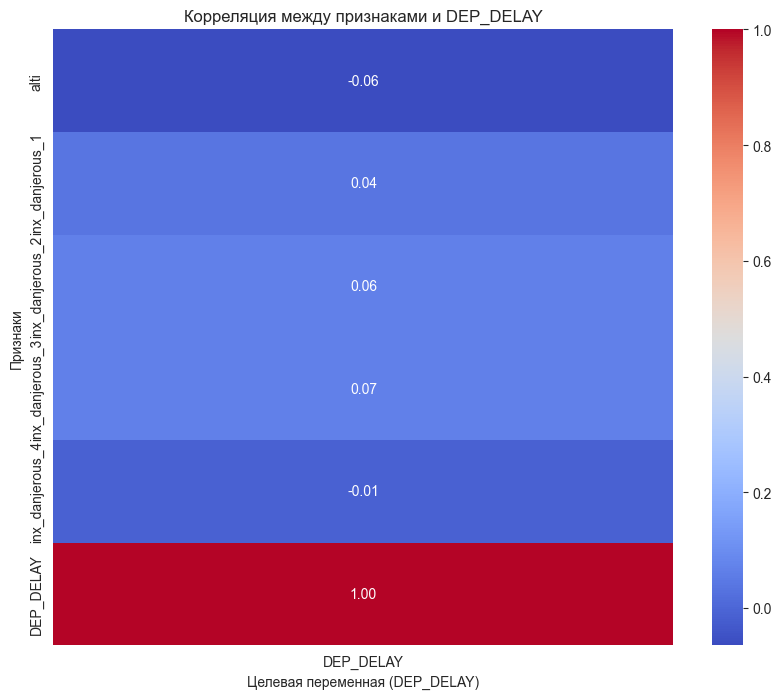

In [33]:
plot_hot_map_with_dep_delay(jfk_flights_weather_df, flag_cols_type='numeric', columns=columns)

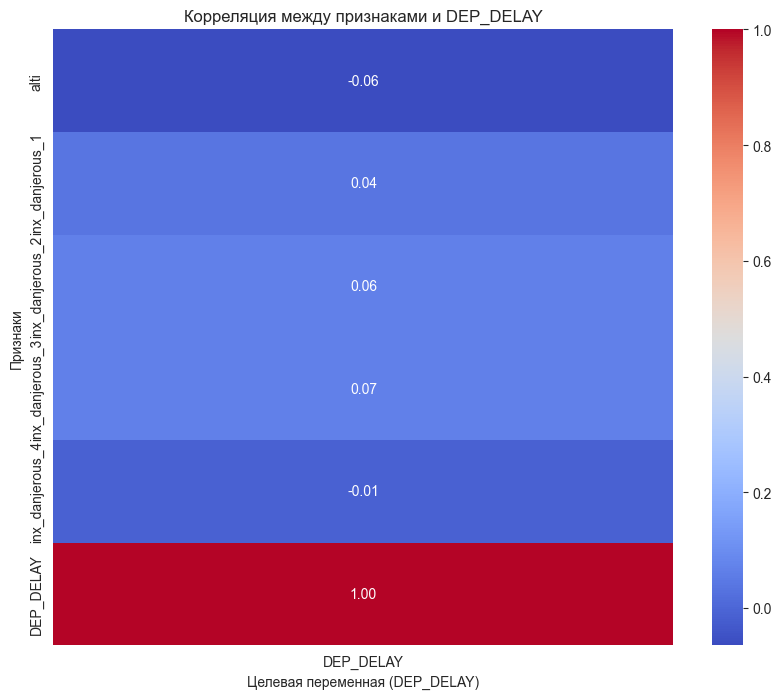

In [34]:
correlation = jfk_flights_weather_df[columns].select_dtypes(include='number').corr()
correlation_with_target = correlation['DEP_DELAY'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['DEP_DELAY']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция между признаками и DEP_DELAY")
plt.xlabel("Целевая переменная (DEP_DELAY)")
plt.ylabel("Признаки")
plt.show()

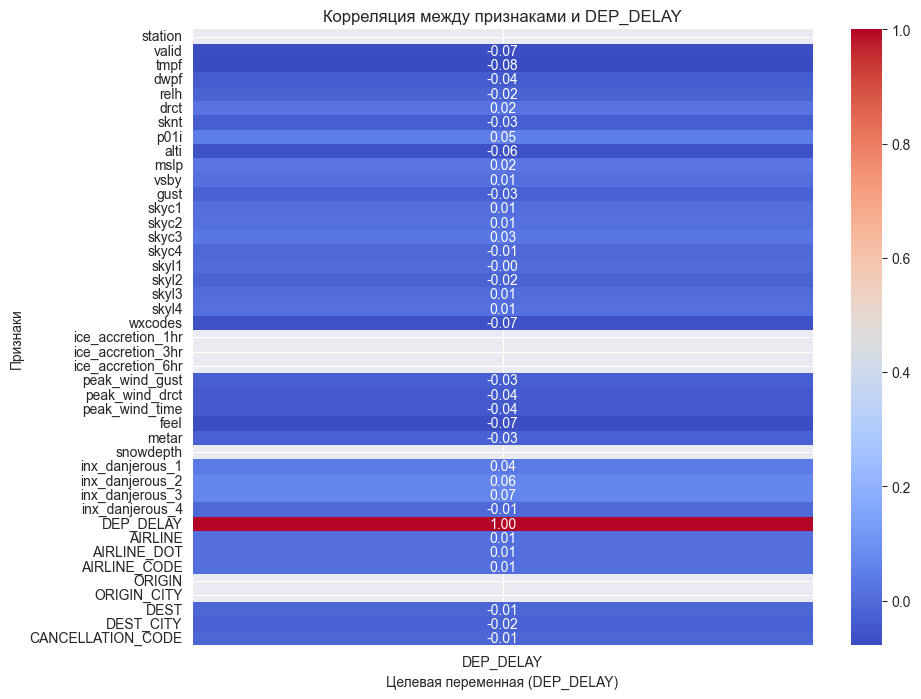

In [35]:
plot_hot_map_with_dep_delay(jfk_flights_weather_df, columns=columns)

In [36]:
df_encoded = jfk_flights_weather_df[columns].copy()
label_encoders = {}

for col in jfk_flights_weather_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(jfk_flights_weather_df[col].astype(str))
    label_encoders[col] = le  # Сохраняем encoder для возможного обратного преобразования

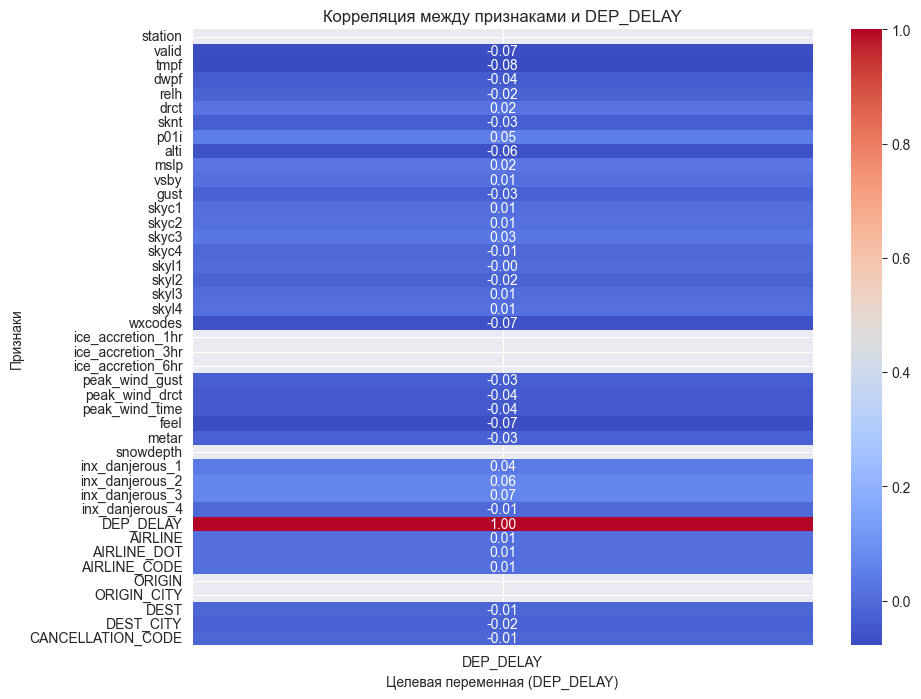

In [37]:
correlation = df_encoded.corr()
correlation_with_target = correlation['DEP_DELAY'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['DEP_DELAY']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляция между признаками и DEP_DELAY")
plt.xlabel("Целевая переменная (DEP_DELAY)")
plt.ylabel("Признаки")
plt.show()

In [38]:
jfk_flights_weather_df.to_csv('jfk_flights_weather_df.csv', index=False)